# Exploratory Data Analysis Exercise with Pandas and Matplotlib

In this exercise, you are responsible for devleoping a data pipeline to ingest and analyze multi-state streamflow records from CSV files in our Canvas Class. This exercise will directly assist with HW #1. Filepath for the data:

    files -> Data -> NWIS_Streaflow -> <STATE>

You will download the data from Canvas and load it into a folder you create called "streamflow_data". Once within the repo, you will load the data into this python notebook and perform exploratory data analysis. After performing data cleaning and time-series alignment with Pandas, you will transition develop Matplotlib visualizations. The core of the assignment emphasizes the Matplotlib philosophy, challenging you to use powerful operators to link, overlay, and explore discharge trends across Idaho, Utah, and Wyoming.

The [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) provides interactive mapping to locate sites and repective metadata.

## Task 1: Select, download, and bring the data into your notebook session

Use the [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) to locate one site below a reservoir,  one site in a headwater catchment, and one site near a rivers terminus to the Great Salt Lake. Using this siteid, find the site data in the Canvas NWIS_Streamflow data folder, download it to your computer, then upload it to this repo into a folder named "streamflow_data". In the code block below, load the data into a Pandas DataFrame and inspect it as we previously did in the Pandas exercises (.head(), .describe()). Write down what you notice. Remove any outliers NaN values, and -999.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
res_df = pd.read_csv("streamflow_data/10140100_1980_2020.csv")
headwater_df = pd.read_csv("streamflow_data/10140700_1980_2020.csv")
GSL_df = pd.read_csv("streamflow_data/10141000_1980_2020.csv")

res_df.head()

,Datetime,USGS_flow,variable,USGS_ID,measurement_unit,qualifiers,series
0,1990-10-01,17.043478,streamflow,10140100,ft3/s,"['A', '[91]']",0
1,1990-10-02,17.510416,streamflow,10140100,ft3/s,"['A', '[91]']",0
2,1990-10-03,17.958334,streamflow,10140100,ft3/s,"['A', '[91]']",0
3,1990-10-04,18.000000,streamflow,10140100,ft3/s,"['A', '[91]']",0
4,1990-10-05,16.979166,streamflow,10140100,ft3/s,"['A', '[91]']",0


In [5]:
res_df["Datetime"] = pd.to_datetime(res_df["Datetime"])
headwater_df["Datetime"] = pd.to_datetime(headwater_df["Datetime"])
GSL_df["Datetime"] = pd.to_datetime(GSL_df["Datetime"])

res_df = res_df.set_index("Datetime")
headwater_df = headwater_df.set_index("Datetime")
GSL_df = GSL_df.set_index("Datetime")

In [6]:
res_df = res_df[["USGS_flow"]].rename(columns={"USGS_flow": "discharge_cfs"})
headwater_df = headwater_df[["USGS_flow"]].rename(columns={"USGS_flow": "discharge_cfs"})
GSL_df = GSL_df[["USGS_flow"]].rename(columns={"USGS_flow": "discharge_cfs"})

In [7]:
res_df = res_df.replace(-999, np.nan).dropna()
headwater_df = headwater_df.replace(-999, np.nan).dropna()
GSL_df = GSL_df.replace(-999, np.nan).dropna()

In [8]:
print(res_df.describe())
print(headwater_df.describe())
print(GSL_df.describe())

       discharge_cfs
count   10349.000000
mean      107.399452
std       215.219657
min         3.397188
25%        10.654166
50%        19.883333
75%       103.750000
max      1550.833400
       discharge_cfs
count    3021.000000
mean      144.457276
std       249.777143
min        10.362708
25%        22.910418
50%        64.708336
75%       139.104170
max      1754.479100
       discharge_cfs
count   11489.000000
mean      328.125434
std       565.554160
min         3.957083
25%        73.914580
50%       119.468750
75%       277.354160
max      5024.583500


## Task 2: Slicing and Dicing

We are interested in examining the data from 2000-2010. Slice the data accordingly and save it to a new Pandas DataFrame.

In [9]:
res_2000_2010 = res_df.loc["2000":"2010"]
headwater_2000_2010 = headwater_df.loc["2000":"2010"]
GSL_2000_2010 = GSL_df.loc["2000":"2010"]

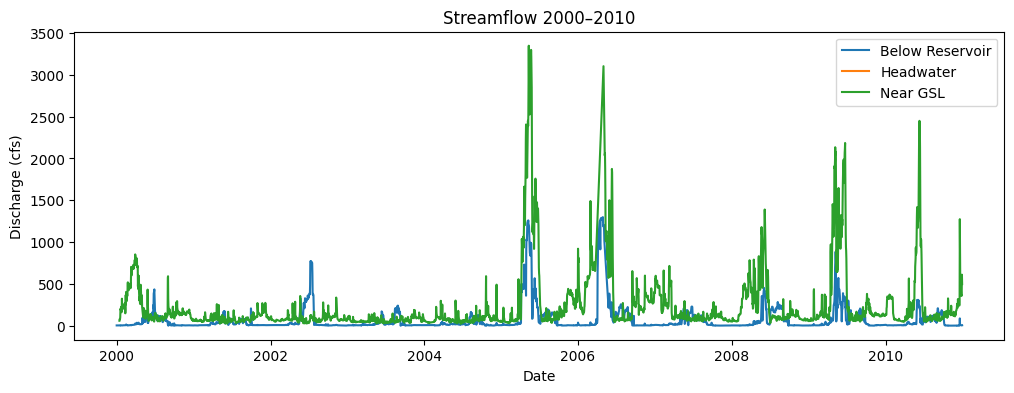

In [10]:
plt.figure(figsize=(12,4))

plt.plot(res_2000_2010.index, res_2000_2010["discharge_cfs"], label="Below Reservoir")
plt.plot(headwater_2000_2010.index, headwater_2000_2010["discharge_cfs"], label="Headwater")
plt.plot(GSL_2000_2010.index, GSL_2000_2010["discharge_cfs"], label="Near GSL")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Discharge (cfs)")
plt.title("Streamflow 2000–2010")
plt.show()

## Task 3: Create plots for each DataFrame using the df.plot() function

Use the built in functionality of Pandas to plot the time series of each stream.

In [12]:
# Weekly and monthly mean discharge
res_weekly = res_df["discharge_cfs"].resample("W").mean()
headwater_weekly = headwater_df["discharge_cfs"].resample("W").mean()
GSL_weekly = GSL_df["discharge_cfs"].resample("W").mean()

res_monthly = res_df["discharge_cfs"].resample("M").mean()
headwater_monthly = headwater_df["discharge_cfs"].resample("M").mean()
GSL_monthly = GSL_df["discharge_cfs"].resample("M").mean()

/scratch/local/u1257442/877820/ipykernel_3377937/1544141964.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  res_monthly = res_df["discharge_cfs"].resample("M").mean()
/scratch/local/u1257442/877820/ipykernel_3377937/1544141964.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  headwater_monthly = headwater_df["discharge_cfs"].resample("M").mean()
/scratch/local/u1257442/877820/ipykernel_3377937/1544141964.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  GSL_monthly = GSL_df["discharge_cfs"].resample("M").mean()


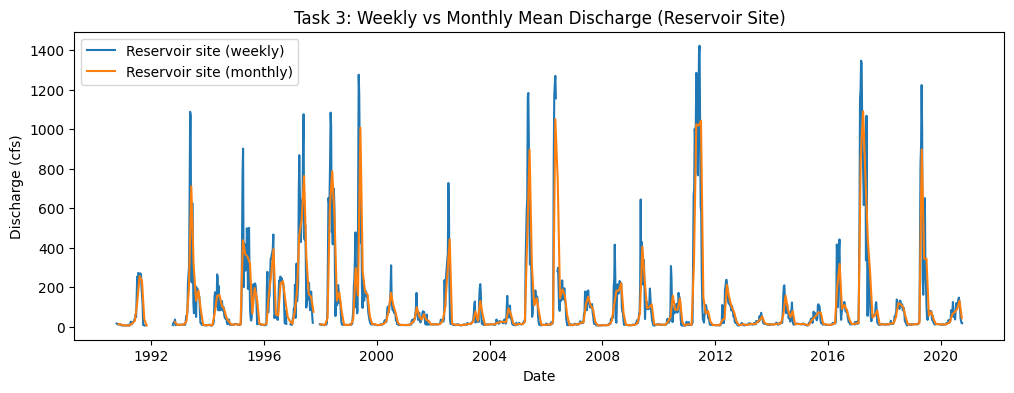

In [13]:
plt.figure(figsize=(12,4))
plt.plot(res_weekly.index, res_weekly, label="Reservoir site (weekly)")
plt.plot(res_monthly.index, res_monthly, label="Reservoir site (monthly)")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Discharge (cfs)")
plt.title("Task 3: Weekly vs Monthly Mean Discharge (Reservoir Site)")
plt.show()

## Task 4: Join/Merge Pandas DataFrames

Create a single dataframe named All_Streams and combine all streamflow monitoring data into this dataframe. Hint, set your index to the date. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus). Print the dataframe.head() to demonstrate that is complete.

In [14]:
res_annual = res_df["discharge_cfs"].resample("Y").mean()
headwater_annual = headwater_df["discharge_cfs"].resample("Y").mean()
GSL_annual = GSL_df["discharge_cfs"].resample("Y").mean()

/scratch/local/u1257442/877820/ipykernel_3377937/2091125254.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  res_annual = res_df["discharge_cfs"].resample("Y").mean()
/scratch/local/u1257442/877820/ipykernel_3377937/2091125254.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  headwater_annual = headwater_df["discharge_cfs"].resample("Y").mean()
/scratch/local/u1257442/877820/ipykernel_3377937/2091125254.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  GSL_annual = GSL_df["discharge_cfs"].resample("Y").mean()


In [15]:
# Water year annual mean (A-SEP means year ends in September)
res_wy_annual = res_df["discharge_cfs"].resample("A-SEP").mean()
headwater_wy_annual = headwater_df["discharge_cfs"].resample("A-SEP").mean()
GSL_wy_annual = GSL_df["discharge_cfs"].resample("A-SEP").mean()

/scratch/local/u1257442/877820/ipykernel_3377937/3666494155.py:2: FutureWarning: 'A-SEP' is deprecated and will be removed in a future version, please use 'YE-SEP' instead.
  res_wy_annual = res_df["discharge_cfs"].resample("A-SEP").mean()
/scratch/local/u1257442/877820/ipykernel_3377937/3666494155.py:3: FutureWarning: 'A-SEP' is deprecated and will be removed in a future version, please use 'YE-SEP' instead.
  headwater_wy_annual = headwater_df["discharge_cfs"].resample("A-SEP").mean()
/scratch/local/u1257442/877820/ipykernel_3377937/3666494155.py:4: FutureWarning: 'A-SEP' is deprecated and will be removed in a future version, please use 'YE-SEP' instead.
  GSL_wy_annual = GSL_df["discharge_cfs"].resample("A-SEP").mean()


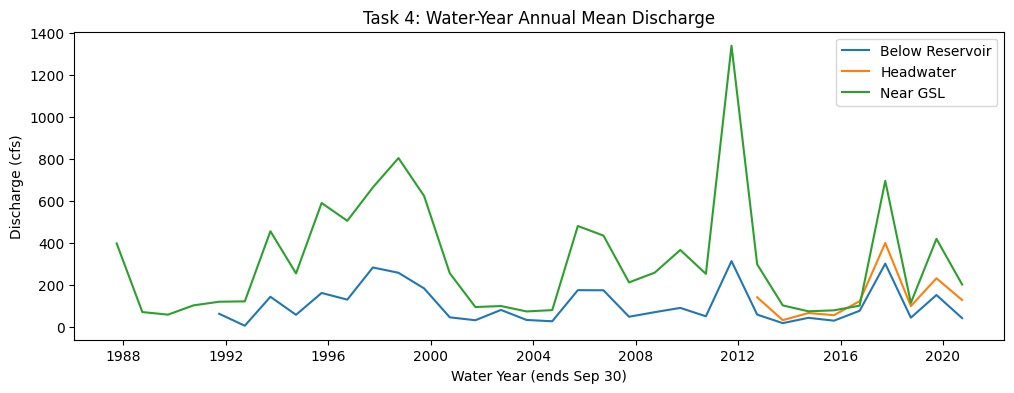

In [17]:
plt.figure(figsize=(12,4))
plt.plot(res_wy_annual.index, res_wy_annual, label="Below Reservoir")
plt.plot(headwater_wy_annual.index, headwater_wy_annual, label="Headwater")
plt.plot(GSL_wy_annual.index, GSL_wy_annual, label="Near GSL")
plt.legend()
plt.xlabel("Water Year (ends Sep 30)")
plt.ylabel("Discharge (cfs)")
plt.title("Task 4: Water-Year Annual Mean Discharge")
plt.show()

## Task 5: Demonstrate your Prowess with Matplotlib

Create a Four separate figures with all three stream on them:

* Figure 1 should be a single plot with all three stream  monitoring locations
* Figure 2 should be a single figure with subplots for each stream monitoring location. The subplots should be 2 rows and 2 columns
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 3 rows and 1 column 
* Figure 3 should be a single figure with subplots for each stream monitoring location. The subplots should be 1 row and 3 columns

Make sure your plots have the correct axes, labeled axes, a title, a legend. Create custom labels for each monitoring station location to communicate there location within the watershed (e.g, headwater, below reservoir, GSL Terminus).

In [18]:
# Find wettest and driest WY based on headwater (you can switch to res_wy_annual if desired)
wet_year = headwater_wy_annual.idxmax().year
dry_year = headwater_wy_annual.idxmin().year

wet_year, dry_year

(2017, 2013)

In [ ]:
def slice_water_year(df, wy):
    start = f"{wy-1}-10-01"
    end = f"{wy}-09-30"
    return df.loc[start:end]

res_wet = slice_water_year(res_df, wet_year)
headwater_wet = slice_water_year(headwater_df, wet_year)

res_dry = slice_water_year(res_df, dry_year)
headwater_dry = slice_water_year(headwater_df, dry_year)

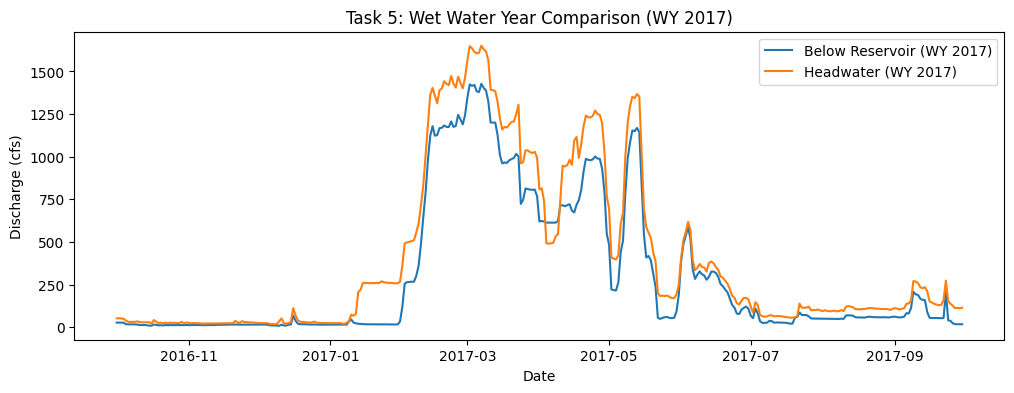

In [20]:
plt.figure(figsize=(12,4))
plt.plot(res_wet.index, res_wet["discharge_cfs"], label=f"Below Reservoir (WY {wet_year})")
plt.plot(headwater_wet.index, headwater_wet["discharge_cfs"], label=f"Headwater (WY {wet_year})")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Discharge (cfs)")
plt.title(f"Task 5: Wet Water Year Comparison (WY {wet_year})")
plt.show()

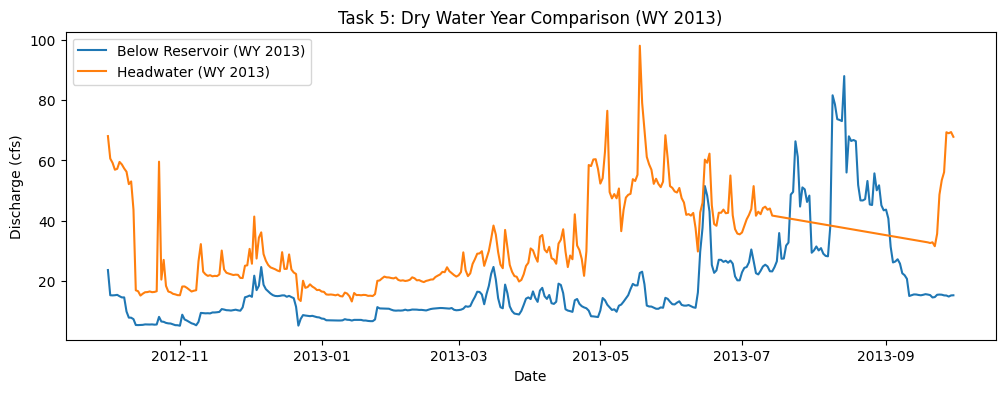

In [21]:
plt.figure(figsize=(12,4))
plt.plot(res_dry.index, res_dry["discharge_cfs"], label=f"Below Reservoir (WY {dry_year})")
plt.plot(headwater_dry.index, headwater_dry["discharge_cfs"], label=f"Headwater (WY {dry_year})")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Discharge (cfs)")
plt.title(f"Task 5: Dry Water Year Comparison (WY {dry_year})")
plt.show()